# Group 4 : BATINA-AGASA Fervent, SOW Assane, PROMWANG Nattirat

# Import packages

In [19]:
# Group 4 : BATINA-AGASA Fervent, SOW Assane, PROMWANG Nattirat

import pandas as pd
import re
from tqdm import tqdm
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
from nltk import word_tokenize
from nltk.corpus import stopwords
from transformers import AutoTokenizer, AutoModelForSequenceClassification

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import data

In [4]:
df = pd.read_csv("C:/Users/Asus/Documents/cours M2/DSS-ML/assignment/data.csv") 


# Translat all the tweets in ENG

In [5]:

from googletrans import Translator # pip install googletrans==4.0.0-rc1

# Initailise translation
translator = Translator()

# Define a function to translate other languages to English 
def translate_to_english(text, language):
    # Perform translation if the language is not in english
    if language != 'en':
        try:
            translation = translator.translate(text, src=language, dest='en')
            return translation.text
        except Exception as e:
            # in case of error, return original text
            return text
    # else, return the original english text as-is
    else:
        return text

# Use tqdm to display a progress bar
tqdm.pandas()

# Apply translate function to non-English tweets
df['text'] = df.progress_apply(lambda row: translate_to_english(row['text'], row['label']), axis=1)


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [04:46<00:00, 10.47it/s]


# Data cleaning

In [6]:
# Load list of English stop words
stop = stopwords.words('english')
stop.append('rt')  # Retweet


# Define a function for data cleaning 
def cleaning(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r'\bgt\s+gt\b', '', text)
    text = " ".join([word for word in text.split() if word not in (stop)])
    return text

# Apply def cleaning function to "text" column with tqdm
tqdm.pandas()
df['text'] = df['text'].progress_apply(cleaning)

df.to_csv("translation.csv", index=False)


100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 6661.65it/s]


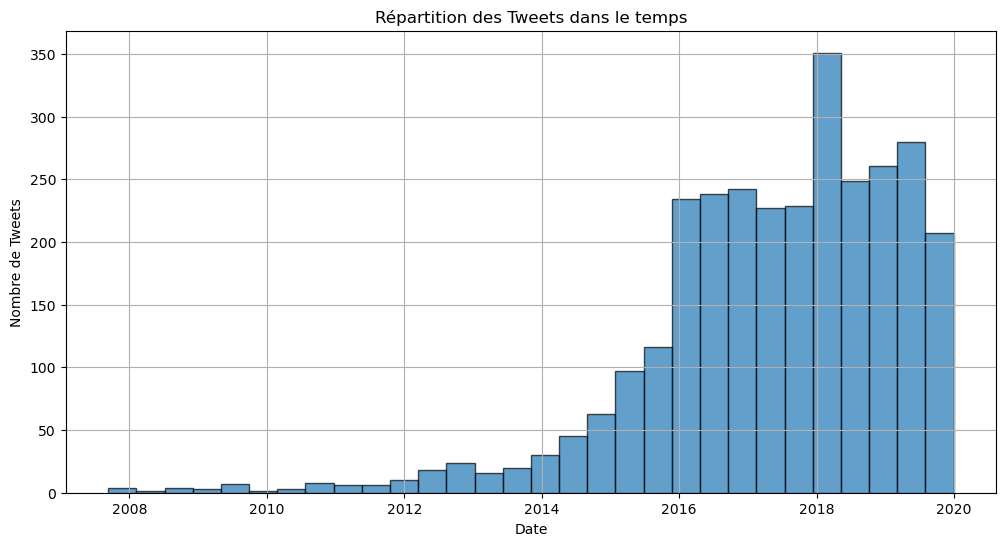

In [7]:
# Visualizing Tweets Over Time
# In this section, we will visualize the distribution of tweets over time using a histogram.
import matplotlib.pyplot as plt


#Convert the 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Plot the histogram
plt.figure(figsize=(12, 6))
df['created_at'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Nombre de Tweets')
plt.title('Répartition des Tweets dans le temps')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\996745870.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette="viridis")


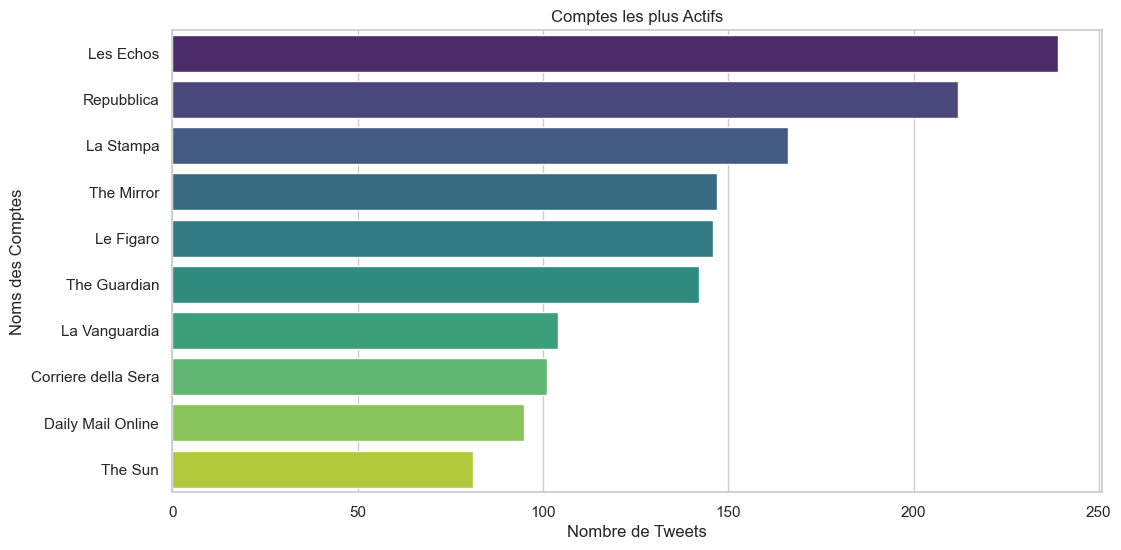

In [8]:
# Most Active Accounts
# In this section, we count the occurrences of the most active accounts.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

account_counts = df['author.name'].value_counts()

# Select the top 10 most active accounts
top_accounts = account_counts.head(10)

# Configure the seaborn style for a more attractive chart
sns.set(style="whitegrid")

# Create a bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette="viridis")
plt.xlabel('Nombre de Tweets')
plt.ylabel('Noms des Comptes')
plt.title('Comptes les plus Actifs')
plt.show()

'In this section, we calculate the frequency of the most active accounts'
'and present the top 10 most active accounts in a bar chart using seaborn to create a visually appealing representation.'

In [9]:
# Key Entities Extraction
# In this section, we extract key entities from the tweets.
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)

# Function to apply NER to a tweet and return the entities
def apply_ner(tweet):
    entities = ner(tweet)
    return entities

tqdm.pandas()
# Apply NER to each tweet and store the entities in a new column
df['key_entities'] = df['text'].progress_apply(apply_ner)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\Asus\anaconda3\Lib\site

In [12]:
# Pour voir la 8e ligne
df['key_entities'].iloc[5]

[]

In [15]:
df.head()

,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,...,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,conversation_search,label,key_entities
0,1075677468294635522,2018-12-20 09:01:08+00:00,borderlands 2 vr rough ready world works bette...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-08-25T13:05:45+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:1075677468294635522,en,[]
1,670304079214702592,2015-11-27 18:12:00+00:00,worlds sexiest robot apparently,"[{""width"": 1024, ""type"": ""photo"", ""media_key"":...","[""3_670304079109844992""]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-08-25T13:04:56+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:670304079214702592,en,[]
2,1085566226116628480,2019-01-16 15:55:31+00:00,un antepasado del que sabamos nada ciencia nea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-08-25T16:43:04+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:1085566226116628480,es,[]
3,968059526594420736,2018-02-26 09:45:51+00:00,im neuen porsche mission e steckt die blockcha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,retweeted,2022-08-25T16:13:46+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:968059526594420736,de,[]
4,784508641508483072,2016-10-07 21:40:10+00:00,tweede wereldoorlog virtual reality herbeleven...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-08-25T16:20:22+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.10.2,conversation_id:784508641508483072,nl,[]


In [13]:
import json
from collections import Counter

# Extract entities from JSON strings
entities_list = []
for entity_json_list in df['key_entities']:
    for entity_json in entity_json_list:
        entity_word = entity_json['word']
        entities_list.append(entity_word)

entity_counts = Counter(entities_list)
sorted_entities = entity_counts.most_common()

# Store the most frequent entities in key subjects
key_subjects = sorted_entities[:10]

# Display the key subjects
for entity, count in key_subjects:
    print(f"Entity: {entity}, Frequency: {count}")


Entity: ##int, Frequency: 26
Entity: ##alia, Frequency: 22
Entity: ##gence, Frequency: 21
Entity: japanese, Frequency: 11
Entity: ##ige, Frequency: 9
Entity: amazon, Frequency: 8
Entity: ##ie, Frequency: 7
Entity: g, Frequency: 7
Entity: ##erman, Frequency: 7
Entity: oculus, Frequency: 7


# Seniments analyse

In [20]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Define the function to analyze the sentiment of a tweet
def analyze_sentiment(text):
  # Tokenize the tweet
  inputs = tokenizer(text, return_tensors="pt")
  # Make a prediction
  outputs = model(**inputs)
  # Get the predicted sentiment (0, 1, or 2)
  sentiment = outputs.logits.argmax().item()
  
  # Map numerical sentiment to words
  sentiment_mapping = {0: "négative", 1: "positive", 2: "neutre"}
  sentiment_word = sentiment_mapping[sentiment]
  
  # Return the sentiment
  return sentiment_word
# Use tqdm to display a progress bar
tqdm.pandas()
# Apply the sentiment analysis function to the dataset of tweets
df["sentiment"] = df["text"].apply(analyze_sentiment)

# Distribution of Sentiments in Tweets

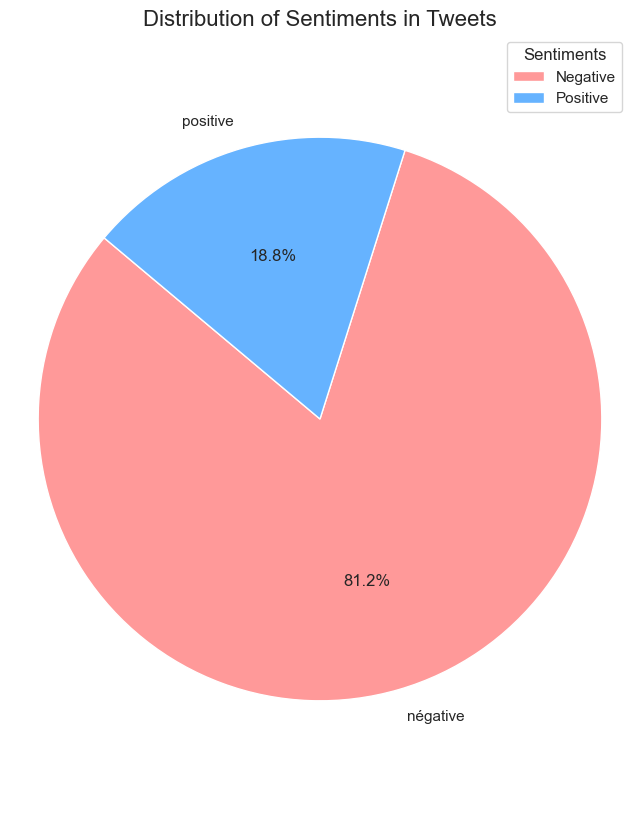

In [21]:
# Count the number of tweets for each sentiment
sentiment_counts = df["sentiment"].value_counts()

# Define colors for each segment of the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a pie chart
plt.figure(figsize=(8, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Distribution of Sentiments in Tweets", fontsize=16)

# Add a legend
legend_labels = ['Negative', 'Positive', 'Neutral']
plt.legend(legend_labels, title="Sentiments", loc="upper right")

# Show the pie chart
plt.axis('equal')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\2809667744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)


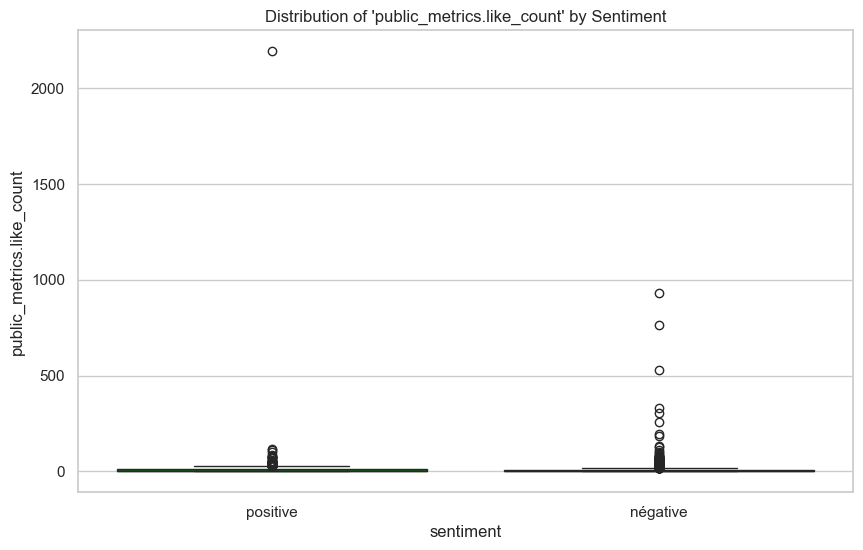

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\2809667744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)


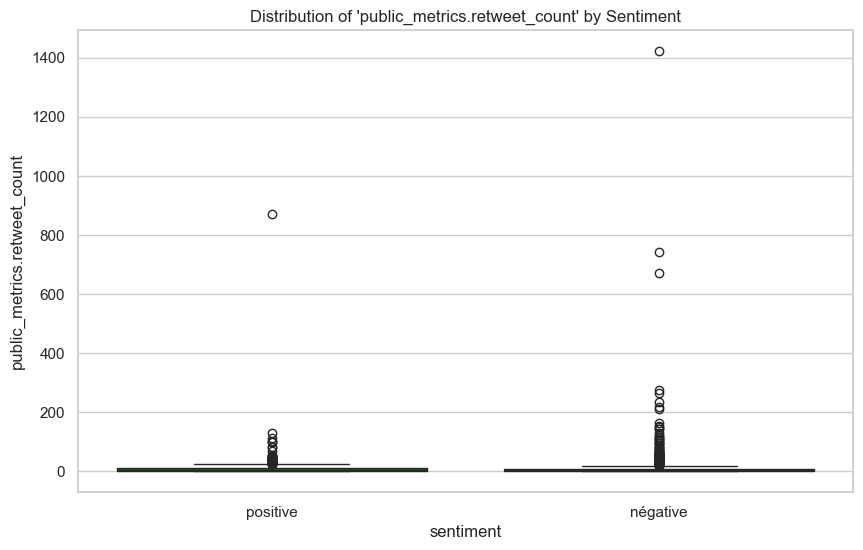

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\2809667744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)


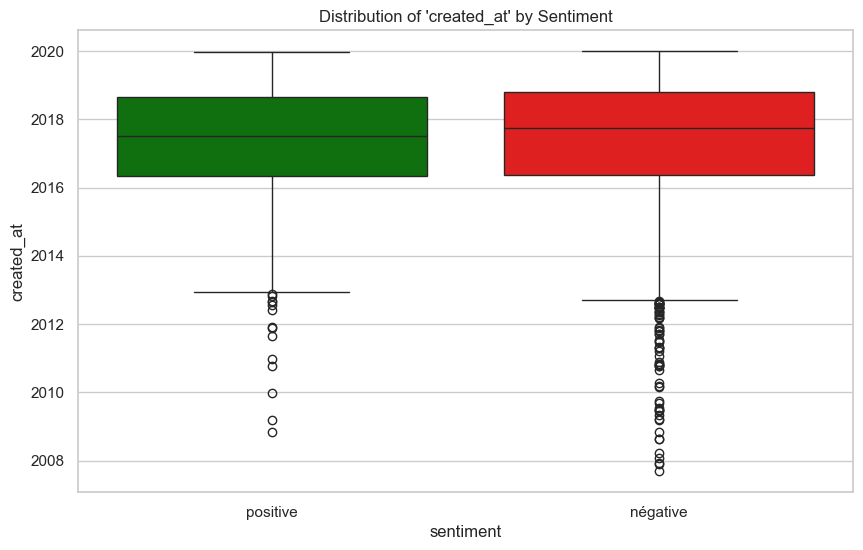

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\2809667744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)


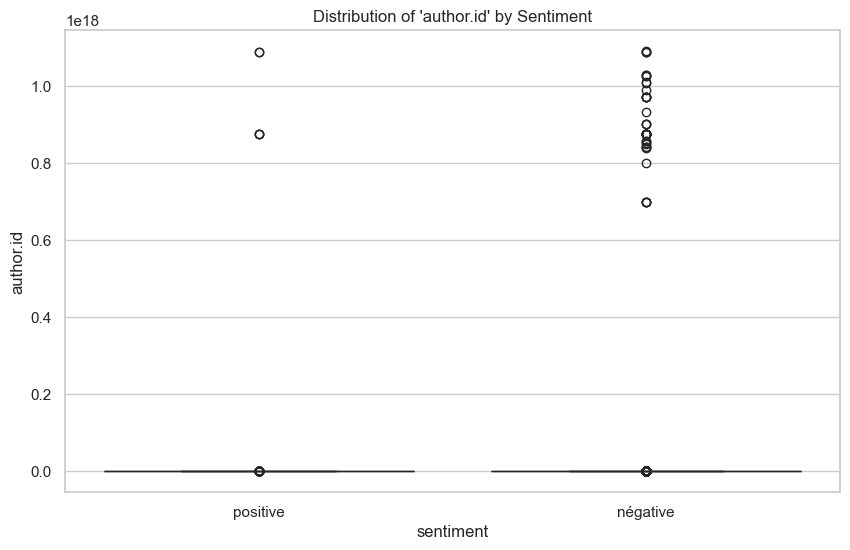

C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\2809667744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)


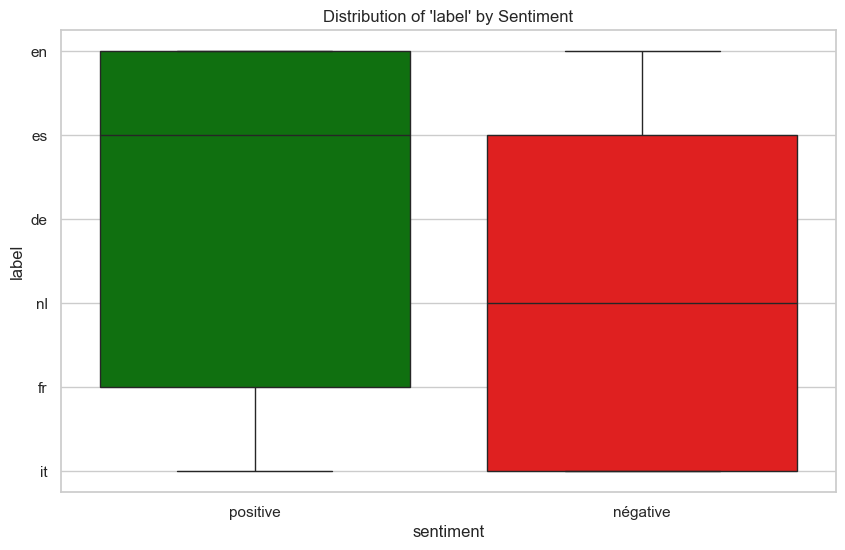

In [22]:
#Distribution of variables by Sentiments in Tweets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'created_at' column to a datetime type
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a custom color palette
palette = {"positive": "green", "négative": "red"}

# Box plot for each numeric variable by sentiment
variables = ["public_metrics.like_count", "public_metrics.retweet_count", "created_at", "author.id", "label"]

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="sentiment", y=variable, data=df, palette=palette)
    plt.title(f"Distribution of '{variable}' by Sentiment")
    plt.show()
#The result is a series of box plots, one for each variable in the variables list, 
#showing how the distribution of that variable varies between different sentiments (positive and negative). 


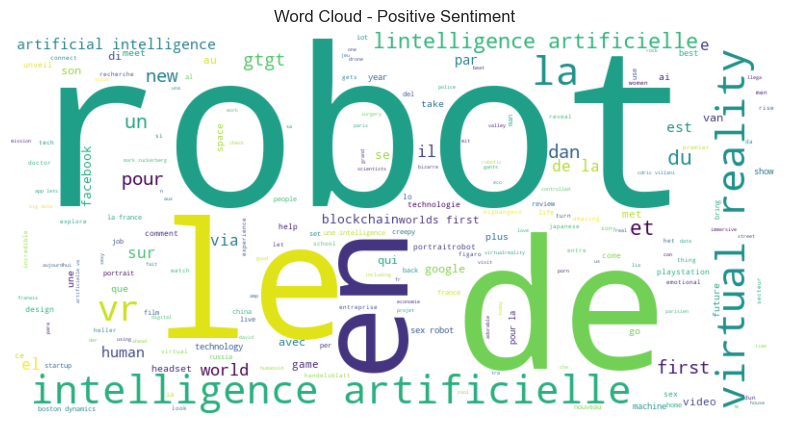

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for positive tweets
positive_tweets = df[df['sentiment'] == 'positive']['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))

plt.figure(figsize=(10, 5)) #size of figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()
#In this code, we generate a word cloud visualization for positive sentiment tweets. 

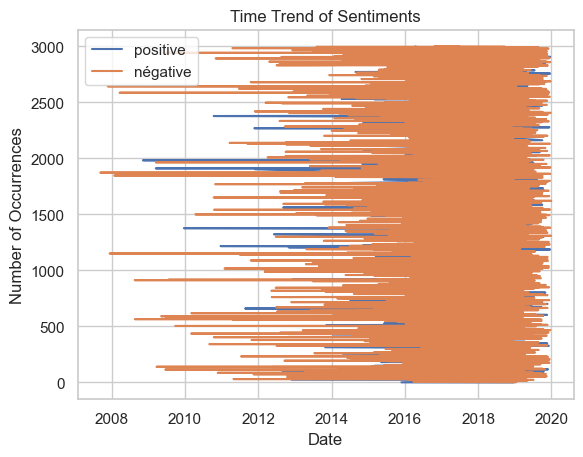

In [24]:
import matplotlib.pyplot as plt

# Convert the 'created_at' column to datetime type
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a time trend chart for each sentiment
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    sentiment_data = df[df['sentiment'] == sentiment]
    plt.plot(sentiment_data['created_at'], sentiment_data.index, label=sentiment)
# ploting
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Time Trend of Sentiments')
plt.legend()
plt.show()

# zero-shot classification

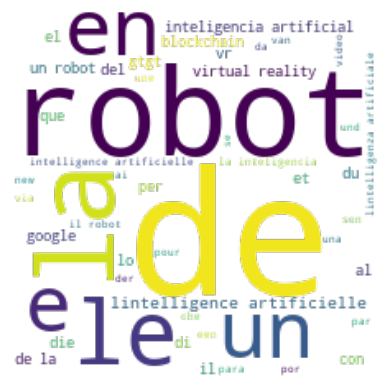

In [26]:
# Find candidate labels with wordcloud

from wordcloud import WordCloud 

def generate_wordcloud(dataframe, output_filename, mask_image_path, max_words=50):
    # Text to apply
    text = ' '.join(x for x in dataframe['text'].values)
    # Use image of twitter logo (a bird) to form the shape of wordcloud
    bird_mask = np.array(Image.open(mask_image_path))
    
    wordcloud = WordCloud(background_color=None, mode='RGBA', max_words=max_words, mask=bird_mask).generate(text)
    # Save the wordcloud to an image file
    wordcloud.to_file(output_filename)
    
    # Open the saved image and display it
    saved_wordcloud = Image.open(output_filename)
    plt.imshow(saved_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(df, "wordcloud.png", "C:\\Users\\Asus\\Documents\\cours M2\\DSS-ML\\assignment\\bird3.png")

# After analysing wordcloud, the candidate lebels 'revolutionary' and 'threat' are chosen. 
# This is to see how Industry 4.0 / AI is perceived overall and by countries 
# either it is perceived as something that could potentially make the world a better place ('revolutionary') 
# or it is understood as something that could have negative impact ('threat')

#In a way, this is also to see how well-trained zero-shot classification pipeline
# As humans, we are able to make judement of words and categorize word groups that have similar sentiments. 
# For example, 
# positive sentiments (towards AI) = 'revolutionary', 'invention','opportunity', 'discovery'
# Negative sentiments (towards AI) = ' threat', 'damage', 'menacing'     
# Thus, a well-trained transformer should be able to give similar results/trends when gaven such inputs.

# In class, we were discussed about the reult of sentiment analysis when given generic 'positive' or 'negative' sentiments 
# and the overall result is neutral (similar probability for positive and negative sentiments)
# Therefore, if I give the label as 'revolutionary' and 'threat', the result is supposed to follow the same trend. 


In [27]:
# Apply zero-shot classification
# First, the goal is to see the overall perception of 4th Industry Revolution from tweets

# Load zero-shot classification pipeline 
from transformers import pipeline

def zero_shot_classification_overall(dataframe, candidate_labels):
    # Initialize zero-shot classification model
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    
    # Concatenate text from the dataframe
    text = ' '.join(x for x in dataframe['text'].values)
    
    # Apply zero-shot classification
    result = classifier(text, candidate_labels)
    
    # Print the results
    for i in range(len(result['labels'])):
        print(f"Label: {result['labels'][i]}, Score: {result['scores'][i]}")

# chosen topics/labels
candidate_labels = ['revolutionary', 'threat']
# Call the function to get overall results
zero_shot_classification_overall(df, candidate_labels)


Label: revolutionary, Score: 0.5102814435958862
Label: threat, Score: 0.4897185266017914


In [32]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 477.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.2 MB/s eta 0:00:00


In [40]:
# Second, to see the perception of AI by countries

# Extract country names from the column 'author.location' in the dataset
from geopy.geocoders import Nominatim


# Initialize geopy Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get city from location string
def get_city(location):
    location_info = geolocator.geocode(location, exactly_one=True)
    if location_info:
        return location_info.raw.get('display_name').split(",")[0]
    else:
        return None

# Extract cities and fill country names
df['city'] = df['author.location'].apply(lambda x: get_city(x))
df['country'] = df['author.location'].apply(lambda x: x if get_city(x) is None else None)

# Once the function def get_city is performed, there's some remaining rows that aren't properly extracted
# The remaining rows are manually done on Excel, the result is the csv file below: 

# Use tqdm to display a progress bar
tqdm.pandas()



In [41]:
df_path = r'C:\Users\Asus\Documents\cours M2\DSS-ML\assignment\translation_location.csv'
dF = pd.read_csv(df_path)

In [42]:
# Load zero-shot classification pipeline 
from transformers import pipeline
from tqdm import tqdm

def zero_shot_classification_bycountry(dF,candidate_labels=['revolutionary', 'threat'], min_data_threshold = 10):

    # Load zero-shot classification pipeline
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    
    # Create an empty dictionary to store the results for each country
    country_results = {}
    
    # Iterate through unique countries in the 'author.location' column
    for country in dF['author.location'].unique():
        # Filter the DataFrame for the current country
        country_df = dF[dF['author.location'] == country]
        
        # Convert NaN or float values in 'text' column to empty strings
        country_df['text'] = country_df['text'].astype(str).fillna('')
        
        # Combine the 'text' values for the current country into a single string
        country_text = ' '.join(country_df['text'].values)
        
        # Apply zero-shot classification for the current country
        result = classifier(country_text, candidate_labels)
        
        # Store the results for the current country in the dictionary
        country_results[country] = {
            'revolutionary_score': result['scores'][result['labels'].index('revolutionary')],
            'threat_score': result['scores'][result['labels'].index('threat')]
        }
    # Print the results for each country
    for country, scores in country_results.items():
        print(f"Country: {country}")
        print(f"Revolutionary Score: {scores['revolutionary_score']}")
        print(f"Threat Score: {scores['threat_score']}")
        print("--------------------")
        
    return country_results
tqdm.pandas()
# Call the function to get country-wise results
country_results = zero_shot_classification_bycountry(dF)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\536559813.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['text'] = country_df['text'].astype(str).fillna('')
C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\536559813.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['text'] = country_df['text'].astype(str).fillna('')
C:\Users\Asus\AppData\Local\Temp\ipykernel_18172\536559813.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Country: UK
Revolutionary Score: 0.4797753393650055
Threat Score: 0.5202246904373169
--------------------
Country: Spain
Revolutionary Score: 0.5374481678009033
Threat Score: 0.4625518023967743
--------------------
Country: Germany
Revolutionary Score: 0.5330925583839417
Threat Score: 0.46690744161605835
--------------------
Country: Netherlands
Revolutionary Score: 0.46634507179260254
Threat Score: 0.5336549878120422
--------------------
Country: France
Revolutionary Score: 0.4760514795780182
Threat Score: 0.5239484906196594
--------------------
Country: Italy
Revolutionary Score: 0.4871317446231842
Threat Score: 0.512868344783783
--------------------
Country: Canada
Revolutionary Score: 0.16174864768981934
Threat Score: 0.8382514119148254
--------------------
Country: USA
Revolutionary Score: 0.4802219867706299
Threat Score: 0.5197779536247253
--------------------
Country: Turkey
Revolutionary Score: 0.14168107509613037
Threat Score: 0.8583189845085144
--------------------
Country: C